In [1]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib.pyplot as plt

import util

In [2]:
util.set_default_pandas_options()

In [3]:
df = pd.read_csv('../data/iris.csv')
df_original = df
df = df.drop('class', axis=1)

X = df.values

Cluster	sepal_length	sepal_width	petal_length	petal_width
--------------------------------------------------------------------------------
0	5.006 (0.343)	3.360 (0.440)	1.562 (0.440)	0.289 (0.212)
1	6.301 (0.634)	2.887 (0.327)	4.959 (0.780)	1.696 (0.416)


Cluster	sepal_length	sepal_width	petal_length	petal_width
--------------------------------------------------------------------------------
0	5.884 (0.448)	2.741 (0.293)	4.389 (0.512)	1.434 (0.300)
1	5.006 (0.352)	3.418 (0.381)	1.464 (0.174)	0.244 (0.107)
2	6.854 (0.488)	3.077 (0.287)	5.715 (0.510)	2.054 (0.296)




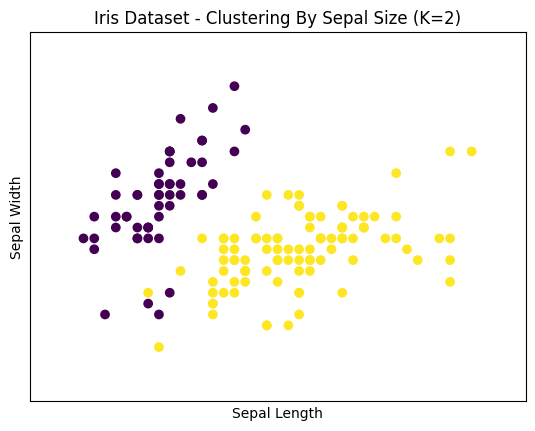

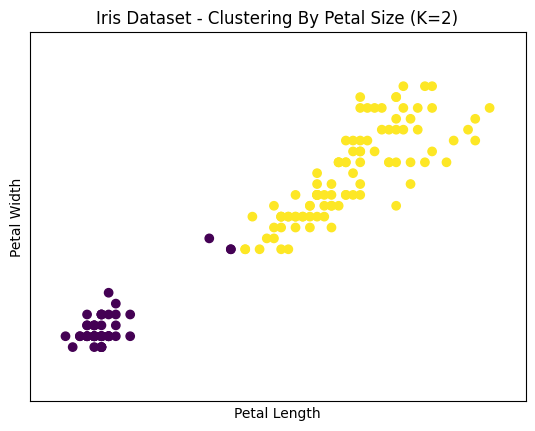

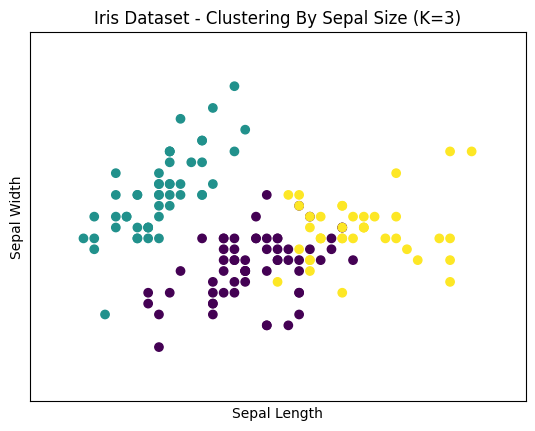

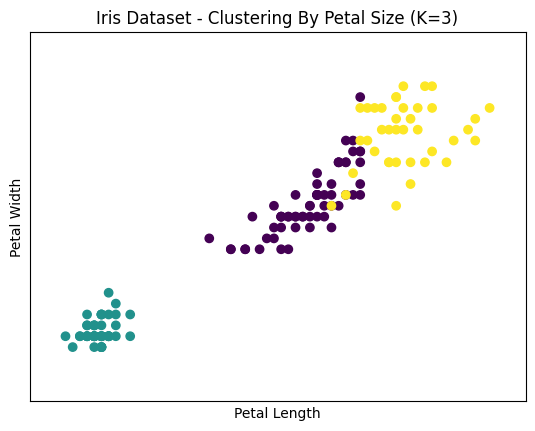

In [4]:
range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans = kmeans.fit(X)

    result = pd.concat([df_original, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
    result = result.sort_values(by=['cluster'], ascending=[True])

    with pd.option_context('display.max_rows', None, 'display.max_columns', None):    
        
        print('{}\t{}\t{}\t{}\t{}'.format('Cluster', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'))
        print('{}'.format('-' * 80))
        
        for cluster in result.cluster.unique():
            print('{:d}\t{:.3f} ({:.3f})\t{:.3f} ({:.3f})\t{:.3f} ({:.3f})\t{:.3f} ({:.3f})'.format(cluster, result[result.cluster==cluster].sepal_length.mean()
                                                                                                            , result[result.cluster==cluster].sepal_length.std()
                                                                                                            , result[result.cluster==cluster].sepal_width.mean()
                                                                                                            , result[result.cluster==cluster].sepal_width.std()
                                                                                                            , result[result.cluster==cluster].petal_length.mean()
                                                                                                            , result[result.cluster==cluster].petal_length.std()
                                                                                                            , result[result.cluster==cluster].petal_width.mean()
                                                                                                            , result[result.cluster==cluster].petal_width.std()))
        
        print('\n{}\n'.format('=' * 80))
        
        # Scatterplot for sepal size

        x_axis = result.sepal_length
        y_axis = result.sepal_width
        species = result.cluster

        x_axis_min, x_axis_max = x_axis.min() - .5, x_axis.max() + .5
        y_axis_min, y_axis_max = y_axis.min() - .5, y_axis.max() + .5
        
        plt.figure()
        plt.title('Iris Dataset - Clustering By Sepal Size (K={})'.format(n_clusters))
        plt.scatter(x_axis, y_axis, c=species)
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.xlim(x_axis_min, x_axis_max)
        plt.ylim(y_axis_min, y_axis_max)
        plt.xticks(())
        plt.yticks(())

        # Scatterplot for petal size

        x_axis = result.petal_length
        y_axis = result.petal_width
        species = result.cluster

        x_axis_min, x_axis_max = x_axis.min() - .5, x_axis.max() + .5
        y_axis_min, y_axis_max = y_axis.min() - .5, y_axis.max() + .5
        
        plt.figure()
        plt.title('Iris Dataset - Clustering By Petal Size (K={})'.format(n_clusters))
        plt.scatter(x_axis, y_axis, c=species)
        plt.xlabel('Petal Length')
        plt.ylabel('Petal Width')
        plt.xlim(x_axis_min, x_axis_max)
        plt.ylim(y_axis_min, y_axis_max)
        plt.xticks(())
        plt.yticks(())

plt.show()